In [1]:
import numpy as np
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

### Setting up developer account:

https://developer.spotify.com/dashboard/applications/d2718f2e1468475380745da190aa7feb

https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

https://betterprogramming.pub/how-to-extract-any-artists-data-using-spotify-s-api-python-and-spotipy-4c079401bc37

In [2]:
client_id = #XXXX
client_secret = #XXXX

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Extract artist names

In [408]:
artist_df = pd.read_csv('wiki_data/all_data_10_19_2021.csv')
print(artist_df.shape)
artist_df.head(5)

(19380, 6)


,genre,member,attr,band,years active,origin
0,/wiki/List_of_Christian_metal_bands,Angelika Korszyńska-Górny,current,"2Tm2,3",1996–present,Poland
1,/wiki/List_of_Christian_metal_bands,Tomasz Budzyński,current,"2Tm2,3",1996–present,Poland
2,/wiki/List_of_Christian_metal_bands,Mateusz Pospieszalski,current,"2Tm2,3",1996–present,Poland
3,/wiki/List_of_Christian_metal_bands,Marcin Pospieszalski,current,"2Tm2,3",1996–present,Poland
4,/wiki/List_of_Christian_metal_bands,Dariusz Malejonek,current,"2Tm2,3",1996–present,Poland


In [332]:
individual_artist_counts = pd.DataFrame(artist_df.member.value_counts())
individual_artist_counts[10:15]

,member
Tony Campos,7
Jörg Michael,6
Janick Gers,6
Johnny Kelly,6
Carl Sentance,6


In [331]:
words_to_remove = [' )', 'See:', 'See', ' [1]', 'See below', ' vocals', ' ', ' guitar', ' (']

In [322]:
artist_df[artist_df['member']== ' Tony Campos']

,genre,member,attr,band,years active,origin
7422,/wiki/List_of_grindcore_bands,Tony Campos,current,Asesino,"2002–2003, 2006–2007, 2009–present","Los Angeles, California, U.S."
8127,/wiki/List_of_groove_metal_bands,Tony Campos,past,Cavalera Conspiracy,2007–present (2007–present),"Phoenix, Arizona, U.S."
8236,/wiki/List_of_groove_metal_bands,Tony Campos,current,Fear Factory,\n1989–2002\n2003–2006\n2009–present\n,"Los Angeles, California, U.S."
8471,/wiki/List_of_groove_metal_bands,Tony Campos,past,Prong (band),1986–19972002–present,"New York City, U.S."
8550,/wiki/List_of_groove_metal_bands,Tony Campos,past,Soulfly,1997–present[1],"Los Angeles, California, U.S.[1]"
9495,/wiki/List_of_industrial_metal_bands,Tony Campos,past,Ministry (band),\n1981–2008\n2011–present\n,"Chicago, Illinois, U.S."
18231,early,Tony Campos,past,Ministry (band),\n1981–2008\n2011–present\n,"Chicago, Illinois, U.S."


In [11]:
unique_artists = list(artist_df.band.value_counts().index)
unique_artists[0:5]

['Krokus (band)',
 'London (heavy metal band)',
 'Thor (band)',
 'Angel Witch',
 'Ministry (band)']

In [14]:
print('Number of artists: ' +  str(len(unique_artists)))

Number of artists: 2023


### Removing non name items

E.g., __band__ or __heavy metal band__ that come from wikipedia

In [22]:
def remove_text_after_paranthesis(band_name):
    # test if there is paranthesis
    if ' (' in band_name:
        band_name = band_name.split(' (')[0]
    return band_name

In [27]:
unique_artists = list(map(remove_text_after_paranthesis, unique_artists))

### Find spotify artist id for each artist

In [97]:
# Create lists to store results
wiki_name, spoti_name, spoti_id, popularity, followers = [], [], [], [], []

# Iterating through every artist
for artist in unique_artists:
    
    # Search for artist name, returning only top result
    artist_search = sp.search(q=artist, type="artist" ,limit=5)
    
    # If no results are returned:
    if artist_search['artists']['total'] == 0:
        wiki_name.append(artist)
        spoti_name.append(np.nan)
        spoti_id.append(np.nan)
        popularity.append(np.nan)
        followers.append(np.nan)
    else:
        # Extract the 5 names that were returned from search
        names_list = []
        for i in range(0, len(artist_search['artists']['items'])):
            names_list.append(artist_search['artists']['items'][i]['name'].lower())

        # Find the position in search results which matches the name exactly
        position = 0
        if artist.lower() in names_list:
            position = names_list.index(artist.lower())
        else: 
            position=0
        
        wiki_name.append(artist)
        spoti_name.append(artist_search['artists']['items'][position]['name'])
        spoti_id.append(artist_search['artists']['items'][position]['uri'])
        popularity.append(artist_search['artists']['items'][position]['popularity'])
        followers.append(artist_search['artists']['items'][position]['followers']['total'])
        
# Create summary dataset
artist_spotify_df = pd.DataFrame({'Group_name_(wiki)': wiki_name,
                                  'Group_name_(spoti)': spoti_name,
                                  'Spotify_id': spoti_id,
                                  'Group_popularity': popularity,
                                  'Group_followers': followers})
artist_spotify_df

,Group_name_(wiki),Group_name_(spoti),Spotify_id,Group_popularity,Group_followers
0,Krokus,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,47.0,223115.0
1,London,London Symphony Orchestra,spotify:artist:5yxyJsFanEAuwSM5kOuZKc,75.0,233876.0
2,Thor,Thor,spotify:artist:4DLElWKADc3A99XmSXwCMj,25.0,6157.0
3,Angel Witch,Angel Witch,spotify:artist:6L48AOtGmQL1ELLoKML7cS,36.0,64856.0
4,Ministry,Ministry,spotify:artist:1DXylZlWbVvlckNqwvjTEt,54.0,381254.0
...,...,...,...,...,...
2018,Pain,Pain,spotify:artist:0hGpZy6ws8FofByMkt0CV1,54.0,130773.0
2019,Negură Bunget,Negură Bunget,spotify:artist:6wLgoPmccgFkKpjPYvJqtM,25.0,24615.0
2020,Leaders,Leaders,spotify:artist:4TRMjWJUsQOmloTxPClNYd,6.0,2104.0
2021,Horde,Horde,spotify:artist:1ciWvybnjvy0LCAvyWFxmm,11.0,5088.0


In [98]:
artist_spotify_df[artist_spotify_df['Group_name_(wiki)'] == artist_spotify_df['Group_name_(spoti)']]

,Group_name_(wiki),Group_name_(spoti),Spotify_id,Group_popularity,Group_followers
0,Krokus,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,47.0,223115.0
2,Thor,Thor,spotify:artist:4DLElWKADc3A99XmSXwCMj,25.0,6157.0
3,Angel Witch,Angel Witch,spotify:artist:6L48AOtGmQL1ELLoKML7cS,36.0,64856.0
4,Ministry,Ministry,spotify:artist:1DXylZlWbVvlckNqwvjTEt,54.0,381254.0
5,Accept,Accept,spotify:artist:3JDIAtVrJdQ7GFOX26LYpv,60.0,685150.0
...,...,...,...,...,...
2018,Pain,Pain,spotify:artist:0hGpZy6ws8FofByMkt0CV1,54.0,130773.0
2019,Negură Bunget,Negură Bunget,spotify:artist:6wLgoPmccgFkKpjPYvJqtM,25.0,24615.0
2020,Leaders,Leaders,spotify:artist:4TRMjWJUsQOmloTxPClNYd,6.0,2104.0
2021,Horde,Horde,spotify:artist:1ciWvybnjvy0LCAvyWFxmm,11.0,5088.0


In [349]:
matching_names = artist_spotify_df[artist_spotify_df['Group_name_(wiki)'] == 
                                   artist_spotify_df['Group_name_(spoti)']]['Group_name_(wiki)']

In [99]:
artist_spotify_df.to_csv('group_to_spotify_id_map.csv')

### Extract album info for each artist

In [115]:
# Create lists to store results
spoti_name, spoti_id, album_id, album_name, number_tracks, release_date = [], [], [], [], [], []

# Iterating through every artist
for i in range(0, artist_spotify_df.shape[0]):
    
    artist_name = artist_spotify_df['Group_name_(spoti)'][i]
    artist_id = artist_spotify_df['Spotify_id'][i]
    
    # Find details only if artist exists in spotify data
    if artist_id is not np.nan:
    
        # Search for albums created by artist
        artist_albums = sp.artist_albums(artist_id)

        album_count = len(artist_albums['items'])

        # Store results
        for j in range(0, album_count):
            spoti_name.append(artist_name)
            spoti_id.append(artist_id)
            album_id.append(artist_albums['items'][j]['id'])
            album_name.append(artist_albums['items'][j]['name'])
            number_tracks.append(artist_albums['items'][j]['total_tracks'])
            release_date.append(artist_albums['items'][j]['release_date'])

# Create summary dataset
album_df = pd.DataFrame({'Group_name_(spoti)': spoti_name,
                                  'Spotify_id': spoti_id,
                                  'album_id': album_id,
                                  'album_name': album_name,
                                  'number_tracks': number_tracks,
                                  'release_date': release_date})
album_df

,Group_name_(spoti),Spotify_id,album_id,album_name,number_tracks,release_date
0,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,6wiuIbDEQliDtYQiWwEfT2,Adios Amigos Live @ Wacken,14,2021-02-19
1,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,1IXnfL0ICTJfjPJxUkYML9,BIG ROCKS,13,2017-01-27
2,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,5eOR0hnYUgZTIk9rxXJ2U1,Long Stick Goes Boom (Live from the House of R...,14,2014-05-23
3,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,56H8TLaZ8cXsYEDqBHBCeg,Long Stick Goes Boom: Live From Da House Of Rust,14,2014-04-22
4,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,23pKjBxrxsLX4pEw6dAioL,Long Stick Goes Boom (Live from the House of R...,14,2014-03-21
...,...,...,...,...,...,...
25011,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,0wu8HuqJdmAtGNZzO6s92c,Death Will Have to Run,1,2020-10-30
25012,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,0JP5x8cEMLUomeZVfP7leS,Lakes of Flame (Comaduster Remix),2,2019-01-21
25013,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,40Lt0SymWc7TK5ffqmfvaR,Lakes of Flame,2,2018-12-18
25014,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,5yqL0JISPMI653GYC8Ebh4,ULTRAnumb (Celldweller Remix),1,2018-11-26


In [116]:
album_df.to_csv('group_album_details.csv')

### Extract top 10 songs for each group

In [121]:
sp.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')['tracks'][0]['id']

'6mFkJmJqdDVQ1REhVfGgd1'

In [124]:
getTrackFeatures('6mFkJmJqdDVQ1REhVfGgd1')

['Wish You Were Here',
 'Wish You Were Here',
 'Pink Floyd',
 '1975-09-12',
 334743,
 76,
 0.481,
 0.735,
 0.481,
 0.262,
 0.0114,
 0.832,
 -15.73,
 0.0414,
 122.861,
 4]

In [125]:
# Create lists to store results
spoti_name, spoti_id, song_id = [], [], []

# Iterating through every artist
for i in range(0, artist_spotify_df.shape[0]):
    
    artist_name = artist_spotify_df['Group_name_(spoti)'][i]
    artist_id = artist_spotify_df['Spotify_id'][i]
    
    # Find details only if artist exists in spotify data
    if artist_id is not np.nan:
    
        # Search for albums created by artist
        artist_tracks = sp.artist_top_tracks(artist_id)
        
        tracks_count = len(artist_tracks['tracks'])

        # Store results
        for j in range(0, tracks_count):
            spoti_name.append(artist_name)
            spoti_id.append(artist_id)
            song_id.append(artist_tracks['tracks'][j]['id'])

# Create summary dataset
artist_top_10_song_ids = pd.DataFrame({'Group_name_(spoti)': spoti_name,
                                      'Spotify_id': spoti_id,
                                      'song_id': song_id})
artist_top_10_song_ids

,Group_name_(spoti),Spotify_id,song_id
0,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,25suYHVUwWFTG6G31kuhZH
1,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,0H8iyBZDnWYgwVNAOcLiah
2,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,7dp39ThK3DGKVneJERWhHe
3,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,09ORSynamyltVPUrxJzxkZ
4,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,4wSFGyYc25YUjqBu9AU1a0
...,...,...,...
19196,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,7kZfyhlbMsSk9dUxzoWCQ7
19197,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,5kfpeoBEHHmIeVYATl6khw
19198,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,5f4P7aUFF75ncl7USrhkef
19199,Blue Stahli,spotify:artist:4DWnSG0RYPAds8EIKY26q3,6UkTua0GgYyaY5qr7eO3Jv


In [126]:
artist_top_10_song_ids.to_csv('top_songs_by_artists.csv')

### Extract track specific features

In [162]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)
    
    if isinstance(meta, type(None)) == True: 
        name = np.nan
        album = np.nan
        artist = np.nan
        release_date = np.nan
        length = np.nan
        popularity = np.nan
    else:
        # meta
        name = meta['name']
        album = meta['album']['name']
        artist = meta['album']['artists'][0]['name']
        release_date = meta['album']['release_date']
        length = meta['duration_ms']
        popularity = meta['popularity']

    if isinstance(features[0], type(None)) == True: 
        acousticness = np.nan
        danceability = np.nan
        energy = np.nan
        instrumentalness = np.nan
        liveness = np.nan
        loudness = np.nan
        speechiness = np.nan
        tempo = np.nan
    else:        
        acousticness = features[0]['acousticness']
        danceability = features[0]['danceability']
        energy = features[0]['energy']
        instrumentalness = features[0]['instrumentalness']
        liveness = features[0]['liveness']
        loudness = features[0]['loudness']
        speechiness = features[0]['speechiness']
        tempo = features[0]['tempo']

    track = [id, name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo]
    return track

In [163]:
# Creating song details df
ids = artist_top_10_song_ids.song_id

# loop over all track ids 
tracks = []
for i in range(len(ids)):
    time.sleep(.0005)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df_song_details = pd.DataFrame(tracks, columns = ['id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 
                                     'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 
                                     'loudness', 'speechiness', 'tempo'])
df_song_details

,id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,25suYHVUwWFTG6G31kuhZH,Screaming in the Night,Head Hunter,Krokus,1983,397773,52,0.475,0.021800,0.576,0.02210,0.3910,-13.059,0.0312,96.378
1,0H8iyBZDnWYgwVNAOcLiah,Born To Be Wild,Hoodoo,Krokus,2010-03-01,214000,46,0.576,0.000508,0.936,0.12600,0.0961,-2.911,0.0425,136.972
2,7dp39ThK3DGKVneJERWhHe,Bedside Radio,Metal Rendez-Vous,Krokus,1980,199040,45,0.581,0.012500,0.572,0.00123,0.0299,-10.976,0.0299,125.278
3,09ORSynamyltVPUrxJzxkZ,Long Stick Goes Boom,One Vice At A Time,Krokus,1982-05-23,312760,39,0.442,0.001380,0.744,0.65100,0.1660,-10.347,0.0574,128.002
4,4wSFGyYc25YUjqBu9AU1a0,Rockin' in the Free World,BIG ROCKS,Krokus,2017-01-27,229926,38,0.547,0.002400,0.953,0.40500,0.1320,-4.287,0.0392,133.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,7kZfyhlbMsSk9dUxzoWCQ7,Frozen - Celldweller vs. Blue Stahli,The Complete Cellout (Deluxe Edition),Celldweller,2011-12-15,299186,44,0.655,0.007700,0.943,0.02620,0.1570,-3.911,0.0772,129.957
19197,5kfpeoBEHHmIeVYATl6khw,Crimewave,Quartz,Blue Stahli,2020-10-02,162823,43,0.622,0.000085,0.812,0.71700,0.4250,-7.339,0.0324,121.982
19198,5f4P7aUFF75ncl7USrhkef,Shotgun Senorita - Zardonic Remix,Shotgun Senorita (Zardonic Remix),Blue Stahli,2017-09-15,268749,43,0.261,0.000031,0.985,0.83600,0.1040,-2.245,0.0455,174.973
19199,6UkTua0GgYyaY5qr7eO3Jv,Enemy,The Devil (Deluxe Edition),Blue Stahli,2015-10-02,228989,40,0.484,0.000512,0.858,0.07470,0.1500,-6.337,0.0595,92.007


In [164]:
df_song_details.to_csv('song_details.csv')

### Aggregate song level data by group

In [165]:
songs_df = artist_top_10_song_ids.merge(df_song_details, how='left', left_on='song_id', right_on='id')
songs_df = songs_df.fillna(0)

In [224]:
songs_summary_artist = songs_df.groupby(['Group_name_(spoti)', 'Spotify_id']).agg({
                           'length': [('mean_song_length', 'mean')],
                           'popularity': [('mean_song_popularity', 'mean'), ('min_song_popularity', 'min'),
                                          ('max_song_popularity', 'max')],
                           'danceability': [('mean_song_danceability', 'mean')],
                           'acousticness': [('mean_song_acousticness', 'mean')],
                           'energy': [('mean_song_energy', 'mean')],
                           'instrumentalness': [('mean_song_instrumentalness', 'mean')],
                           'liveness': [('mean_song_liveness', 'mean')],
                           'loudness': [('mean_song_loudness', 'mean')],
                           'speechiness': [('mean_song_speechiness', 'mean')],
                           'tempo': [('mean_song_tempo', 'mean')]}).reset_index()

# Extract group_name and id
group_name = songs_summary_artist['Group_name_(spoti)'].values
group_id = songs_summary_artist['Spotify_id'].values

# Create final dataframe
songs_summary_artist_num = songs_summary_artist.droplevel(level=0, axis=1)
songs_summary_artist_num = songs_summary_artist_num[['mean_song_length', 'min_song_popularity', 'max_song_popularity', 
                                            'mean_song_danceability', 'mean_song_acousticness',
                                            'mean_song_energy', 'mean_song_instrumentalness', 'mean_song_liveness',
                                            'mean_song_loudness', 'mean_song_speechiness', 'mean_song_tempo']]
songs_summary_artist_final = pd.DataFrame({'Group_name_(spoti)':group_name,
                                          'Spotify_id':group_id})
for i in songs_summary_artist_num.columns:
    songs_summary_artist_final[i] = songs_summary_artist_num[i]

# Return df
songs_summary_artist_final

,Group_name_(spoti),Spotify_id,mean_song_length,min_song_popularity,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo
0,#Undisputed,spotify:artist:7IGEcqPKqdUfASyYEEH6FN,237785.1,33,39,0.7374,0.066300,0.6358,0.000112,0.26000,-8.1673,0.27070,130.0818
1,10 Years,spotify:artist:0REMf7H0VP6DwfZ9MbuWph,200104.1,41,66,0.4584,0.128536,0.7435,0.002373,0.12994,-4.9834,0.04562,144.2515
2,100 Demons,spotify:artist:10Elg8MGZcabd4bPEdEWJs,168097.0,16,39,0.2668,0.000022,0.9364,0.006177,0.26670,-4.9969,0.10519,114.0447
3,108,spotify:artist:3j2S24uHONLPeKvYjG14oH,148121.0,8,19,0.3482,0.001603,0.8379,0.414448,0.24568,-8.3767,0.09833,139.5114
4,12 Stones,spotify:artist:0DrXhci3WAyo0WJv1RBOG6,210370.3,37,61,0.3796,0.115851,0.8317,0.000027,0.24924,-4.6427,0.06642,143.3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,vain,spotify:artist:0kZJldvnKc7MI0ztoNx3p7,140796.0,0,2,0.5561,0.244270,0.6071,0.000031,0.20786,-9.1582,0.17602,119.3291
1965,xDISCIPLEx A.D.,spotify:artist:5hgFOl5p329JpCQ9Y5rcjm,150886.3,3,8,0.3407,0.001009,0.9461,0.152943,0.25420,-5.4470,0.05470,96.6843
1966,xDeathstarx,spotify:artist:6fz337dnK6wGTEI94msCBN,186893.1,7,17,0.4885,0.000196,0.9590,0.008339,0.17683,-5.8171,0.11759,145.7428
1967,zebrahead,spotify:artist:6SiyKSeJo6gcsS2NvuAbsl,200501.2,47,65,0.4695,0.013277,0.9727,0.000006,0.25515,-3.3492,0.15485,145.0116


In [226]:
songs_summary_artist_final['song_popularity_range'] = songs_summary_artist_final.max_song_popularity - \
                                                      songs_summary_artist_final.min_song_popularity
songs_summary_artist_final

,Group_name_(spoti),Spotify_id,mean_song_length,min_song_popularity,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
0,#Undisputed,spotify:artist:7IGEcqPKqdUfASyYEEH6FN,237785.1,33,39,0.7374,0.066300,0.6358,0.000112,0.26000,-8.1673,0.27070,130.0818,6
1,10 Years,spotify:artist:0REMf7H0VP6DwfZ9MbuWph,200104.1,41,66,0.4584,0.128536,0.7435,0.002373,0.12994,-4.9834,0.04562,144.2515,25
2,100 Demons,spotify:artist:10Elg8MGZcabd4bPEdEWJs,168097.0,16,39,0.2668,0.000022,0.9364,0.006177,0.26670,-4.9969,0.10519,114.0447,23
3,108,spotify:artist:3j2S24uHONLPeKvYjG14oH,148121.0,8,19,0.3482,0.001603,0.8379,0.414448,0.24568,-8.3767,0.09833,139.5114,11
4,12 Stones,spotify:artist:0DrXhci3WAyo0WJv1RBOG6,210370.3,37,61,0.3796,0.115851,0.8317,0.000027,0.24924,-4.6427,0.06642,143.3272,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,vain,spotify:artist:0kZJldvnKc7MI0ztoNx3p7,140796.0,0,2,0.5561,0.244270,0.6071,0.000031,0.20786,-9.1582,0.17602,119.3291,2
1965,xDISCIPLEx A.D.,spotify:artist:5hgFOl5p329JpCQ9Y5rcjm,150886.3,3,8,0.3407,0.001009,0.9461,0.152943,0.25420,-5.4470,0.05470,96.6843,5
1966,xDeathstarx,spotify:artist:6fz337dnK6wGTEI94msCBN,186893.1,7,17,0.4885,0.000196,0.9590,0.008339,0.17683,-5.8171,0.11759,145.7428,10
1967,zebrahead,spotify:artist:6SiyKSeJo6gcsS2NvuAbsl,200501.2,47,65,0.4695,0.013277,0.9727,0.000006,0.25515,-3.3492,0.15485,145.0116,18


### Aggregate album level data by group

In [222]:
album_summary_artist = album_df.groupby(['Group_name_(spoti)', 'Spotify_id']).agg({
                           'album_id': [('count_albums', 'count')],
                           'number_tracks': [('mean_tracks_per_album', 'mean'), ('total_tracks', 'sum')],
                           'release_date': [('earliest_release_date', 'min'),
                                            ('latest_release_date', 'max')]}).reset_index()

# Extract group_name and id
group_name = album_summary_artist['Group_name_(spoti)'].values
group_id = album_summary_artist['Spotify_id'].values

# Create final dataframe
album_summary_artist_num = album_summary_artist.droplevel(level=0, axis=1)
album_summary_artist_num = album_summary_artist_num[['count_albums', 'mean_tracks_per_album', 'total_tracks', 
                                            'earliest_release_date', 'latest_release_date']]
album_summary_artist_final = pd.DataFrame({'Group_name_(spoti)':group_name,
                                          'Spotify_id':group_id})
for i in album_summary_artist_num.columns:
    album_summary_artist_final[i] = album_summary_artist_num[i]

# Return df
album_summary_artist_final

,Group_name_(spoti),Spotify_id,count_albums,mean_tracks_per_album,total_tracks,earliest_release_date,latest_release_date
0,#Undisputed,spotify:artist:7IGEcqPKqdUfASyYEEH6FN,18,1.000000,18,2017-10-01,2019-09-01
1,10 Years,spotify:artist:0REMf7H0VP6DwfZ9MbuWph,20,9.350000,187,2005-01-01,2021-11-22
2,100 Demons,spotify:artist:10Elg8MGZcabd4bPEdEWJs,4,13.000000,52,2004-03-09,2016-10-07
3,108,spotify:artist:3j2S24uHONLPeKvYjG14oH,7,14.000000,98,1997-01-01,2021-01-16
4,12 Stones,spotify:artist:0DrXhci3WAyo0WJv1RBOG6,20,4.750000,95,2002-01-01,2020-11-13
...,...,...,...,...,...,...,...
1975,vain,spotify:artist:0kZJldvnKc7MI0ztoNx3p7,8,1.625000,13,2021-01-20,2021-10-22
1976,xDISCIPLEx A.D.,spotify:artist:5hgFOl5p329JpCQ9Y5rcjm,11,12.090909,133,1996-01-01,2003-01-01
1977,xDeathstarx,spotify:artist:6fz337dnK6wGTEI94msCBN,5,15.400000,77,2005-07-12,2015-04-28
1978,zebrahead,spotify:artist:6SiyKSeJo6gcsS2NvuAbsl,20,15.800000,316,2006-10-24,2020-08-07


In [223]:
# Calculating longevity
longevity = []
for i in range(0,album_summary_artist_final.shape[0]):
    early = int(album_summary_artist_final.earliest_release_date[i][0:4])
    late = int(album_summary_artist_final.latest_release_date[i][0:4])
    delta = late - early
    longevity.append(delta)

# Adding to df
album_summary_artist_final['longevity'] = longevity
album_summary_artist_final

,Group_name_(spoti),Spotify_id,count_albums,mean_tracks_per_album,total_tracks,earliest_release_date,latest_release_date,longevity
0,#Undisputed,spotify:artist:7IGEcqPKqdUfASyYEEH6FN,18,1.000000,18,2017-10-01,2019-09-01,2
1,10 Years,spotify:artist:0REMf7H0VP6DwfZ9MbuWph,20,9.350000,187,2005-01-01,2021-11-22,16
2,100 Demons,spotify:artist:10Elg8MGZcabd4bPEdEWJs,4,13.000000,52,2004-03-09,2016-10-07,12
3,108,spotify:artist:3j2S24uHONLPeKvYjG14oH,7,14.000000,98,1997-01-01,2021-01-16,24
4,12 Stones,spotify:artist:0DrXhci3WAyo0WJv1RBOG6,20,4.750000,95,2002-01-01,2020-11-13,18
...,...,...,...,...,...,...,...,...
1975,vain,spotify:artist:0kZJldvnKc7MI0ztoNx3p7,8,1.625000,13,2021-01-20,2021-10-22,0
1976,xDISCIPLEx A.D.,spotify:artist:5hgFOl5p329JpCQ9Y5rcjm,11,12.090909,133,1996-01-01,2003-01-01,7
1977,xDeathstarx,spotify:artist:6fz337dnK6wGTEI94msCBN,5,15.400000,77,2005-07-12,2015-04-28,10
1978,zebrahead,spotify:artist:6SiyKSeJo6gcsS2NvuAbsl,20,15.800000,316,2006-10-24,2020-08-07,14


### Merging everything 

In [229]:
artist_spotify_df.shape

(2023, 5)

In [231]:
final_df = artist_spotify_df.merge(album_summary_artist_final, on= 'Spotify_id', how='left')
final_df.shape

(2023, 12)

In [232]:
final_df = final_df.merge(songs_summary_artist_final, on= 'Spotify_id', how='left')
final_df.shape

(2023, 25)

In [234]:
final_df

,Group_name_(wiki),Group_name_(spoti)_x,Spotify_id,Group_popularity,Group_followers,Group_name_(spoti)_y,count_albums,mean_tracks_per_album,total_tracks,earliest_release_date,...,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
0,Krokus,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,47.0,223115.0,Krokus,20.0,12.200000,244.0,1984-02-20,...,52.0,0.537900,0.012151,0.727400,0.242673,0.203890,-9.114000,0.036990,116.262300,18.0
1,London,London Symphony Orchestra,spotify:artist:5yxyJsFanEAuwSM5kOuZKc,75.0,233876.0,London Symphony Orchestra,20.0,15.600000,312.0,2021-06-11,...,62.0,0.324600,0.688700,0.261060,0.560363,0.108330,-16.334200,0.048500,102.366100,14.0
2,Thor,Thor,spotify:artist:4DLElWKADc3A99XmSXwCMj,25.0,6157.0,Thor,20.0,15.400000,308.0,2001-07-01,...,27.0,0.385100,0.079551,0.817000,0.552770,0.209140,-7.424900,0.058660,129.250500,14.0
3,Angel Witch,Angel Witch,spotify:artist:6L48AOtGmQL1ELLoKML7cS,36.0,64856.0,Angel Witch,17.0,17.000000,289.0,1980-03-12,...,49.0,0.287600,0.000659,0.760100,0.112230,0.262060,-10.866500,0.073670,135.138000,29.0
4,Ministry,Ministry,spotify:artist:1DXylZlWbVvlckNqwvjTEt,54.0,381254.0,Ministry,20.0,16.600000,332.0,2010-09-10,...,54.0,0.566800,0.000074,0.889000,0.352359,0.333620,-6.733200,0.055430,130.699400,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Pain,Pain,spotify:artist:0hGpZy6ws8FofByMkt0CV1,54.0,130773.0,Pain,20.0,9.100000,182.0,1999-12-01,...,60.0,0.490600,0.000643,0.892300,0.149308,0.204140,-5.646500,0.046550,118.013800,27.0
2019,Negură Bunget,Negură Bunget,spotify:artist:6wLgoPmccgFkKpjPYvJqtM,25.0,24615.0,Negură Bunget,18.0,6.388889,115.0,1995-01-01,...,23.0,0.249000,0.049732,0.530160,0.858400,0.132770,-8.508900,0.049640,114.656400,6.0
2020,Leaders,Leaders,spotify:artist:4TRMjWJUsQOmloTxPClNYd,6.0,2104.0,Leaders,11.0,52.272727,575.0,1993-09-30,...,7.0,0.382100,0.132440,0.883700,0.052046,0.260210,-5.842000,0.166520,142.581900,5.0
2021,Horde,Horde,spotify:artist:1ciWvybnjvy0LCAvyWFxmm,11.0,5088.0,Horde,3.0,11.666667,35.0,1994,...,15.0,0.235500,0.105452,0.904870,0.765700,0.303690,-8.779800,0.110490,107.702100,10.0


In [236]:
final_df[final_df['Group_name_(wiki)']==final_df['Group_name_(spoti)_x']]

,Group_name_(wiki),Group_name_(spoti)_x,Spotify_id,Group_popularity,Group_followers,Group_name_(spoti)_y,count_albums,mean_tracks_per_album,total_tracks,earliest_release_date,...,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
0,Krokus,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,47.0,223115.0,Krokus,20.0,12.200000,244.0,1984-02-20,...,52.0,0.537900,0.012151,0.727400,0.242673,0.203890,-9.114000,0.036990,116.262300,18.0
2,Thor,Thor,spotify:artist:4DLElWKADc3A99XmSXwCMj,25.0,6157.0,Thor,20.0,15.400000,308.0,2001-07-01,...,27.0,0.385100,0.079551,0.817000,0.552770,0.209140,-7.424900,0.058660,129.250500,14.0
3,Angel Witch,Angel Witch,spotify:artist:6L48AOtGmQL1ELLoKML7cS,36.0,64856.0,Angel Witch,17.0,17.000000,289.0,1980-03-12,...,49.0,0.287600,0.000659,0.760100,0.112230,0.262060,-10.866500,0.073670,135.138000,29.0
4,Ministry,Ministry,spotify:artist:1DXylZlWbVvlckNqwvjTEt,54.0,381254.0,Ministry,20.0,16.600000,332.0,2010-09-10,...,54.0,0.566800,0.000074,0.889000,0.352359,0.333620,-6.733200,0.055430,130.699400,12.0
5,Accept,Accept,spotify:artist:3JDIAtVrJdQ7GFOX26LYpv,60.0,685150.0,Accept,20.0,14.600000,292.0,1986-10-31,...,60.0,0.499400,0.004892,0.841600,0.059293,0.200230,-6.611200,0.063820,130.542100,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Pain,Pain,spotify:artist:0hGpZy6ws8FofByMkt0CV1,54.0,130773.0,Pain,20.0,9.100000,182.0,1999-12-01,...,60.0,0.490600,0.000643,0.892300,0.149308,0.204140,-5.646500,0.046550,118.013800,27.0
2019,Negură Bunget,Negură Bunget,spotify:artist:6wLgoPmccgFkKpjPYvJqtM,25.0,24615.0,Negură Bunget,18.0,6.388889,115.0,1995-01-01,...,23.0,0.249000,0.049732,0.530160,0.858400,0.132770,-8.508900,0.049640,114.656400,6.0
2020,Leaders,Leaders,spotify:artist:4TRMjWJUsQOmloTxPClNYd,6.0,2104.0,Leaders,11.0,52.272727,575.0,1993-09-30,...,7.0,0.382100,0.132440,0.883700,0.052046,0.260210,-5.842000,0.166520,142.581900,5.0
2021,Horde,Horde,spotify:artist:1ciWvybnjvy0LCAvyWFxmm,11.0,5088.0,Horde,3.0,11.666667,35.0,1994,...,15.0,0.235500,0.105452,0.904870,0.765700,0.303690,-8.779800,0.110490,107.702100,10.0


In [238]:
final_df[final_df['Group_name_(wiki)']!=final_df['Group_name_(spoti)_x']]

,Group_name_(wiki),Group_name_(spoti)_x,Spotify_id,Group_popularity,Group_followers,Group_name_(spoti)_y,count_albums,mean_tracks_per_album,total_tracks,earliest_release_date,...,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
1,London,London Symphony Orchestra,spotify:artist:5yxyJsFanEAuwSM5kOuZKc,75.0,233876.0,London Symphony Orchestra,20.0,15.600000,312.0,2021-06-11,...,62.0,0.324600,0.688700,0.261060,0.560363,0.108330,-16.334200,0.048500,102.366100,14.0
29,Flotsam and Jetsam,Flotsam & Jetsam,spotify:artist:1ApBh0VSoxRjjT3kFQZrpz,39.0,72746.0,Flotsam & Jetsam,20.0,11.750000,235.0,1988-05-15,...,41.0,0.356200,0.000788,0.967200,0.012283,0.314830,-6.866800,0.095370,149.217000,17.0
31,Divlje jagode,Divlje Jagode,spotify:artist:6mMlq8oWkHZwC2rd2RZbYF,37.0,29148.0,Divlje Jagode,20.0,21.300000,426.0,1978-01-01,...,40.0,0.426900,0.056881,0.712500,0.000248,0.174520,-6.653900,0.037140,127.288300,17.0
32,Saint,SAINt JHN,spotify:artist:0H39MdGGX6dbnnQPt6NQkZ,75.0,781985.0,SAINt JHN,20.0,3.550000,71.0,2018-03-30,...,71.0,0.762900,0.198890,0.616700,0.000954,0.201600,-5.517600,0.092880,116.265300,22.0
35,Earthshaker,EARTHSHAKER,spotify:artist:2v0ECQG7tTDA2nDcaK92N3,29.0,12097.0,EARTHSHAKER,19.0,14.526316,276.0,1983-06-21,...,4.0,0.322000,0.002130,0.991000,0.000000,0.175000,-3.893000,0.127000,173.893000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,LVL,LVL1,spotify:artist:5cIVFxPSiXer2MuaoEATkJ,55.0,24082.0,LVL1,4.0,1.000000,4.0,2021-05-14,...,70.0,0.754667,0.066111,0.777333,0.032236,0.104967,-5.581000,0.049767,135.300667,45.0
2009,The Sins of Thy Beloved,The Sins Of Thy Beloved,spotify:artist:0eFg9cfr8pPciNtqP5s14S,27.0,36926.0,The Sins Of Thy Beloved,8.0,8.000000,64.0,1998,...,18.0,0.272700,0.083697,0.745400,0.724600,0.278230,-8.288200,0.045100,124.667400,13.0
2013,Candy Harlots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,Almôra,Almora,spotify:artist:5rThgU18h0ejIeElIlLWkS,35.0,28030.0,Almora,1.0,9.000000,9.0,2008-02-21,...,46.0,0.244556,0.147927,0.668667,0.119083,0.233544,-9.068778,0.050211,139.057778,26.0


In [235]:
final_df.columns

Index(['Group_name_(wiki)', 'Group_name_(spoti)_x', 'Spotify_id',
       'Group_popularity', 'Group_followers', 'Group_name_(spoti)_y',
       'count_albums', 'mean_tracks_per_album', 'total_tracks',
       'earliest_release_date', 'latest_release_date', 'longevity',
       'Group_name_(spoti)', 'mean_song_length', 'min_song_popularity',
       'max_song_popularity', 'mean_song_danceability',
       'mean_song_acousticness', 'mean_song_energy',
       'mean_song_instrumentalness', 'mean_song_liveness',
       'mean_song_loudness', 'mean_song_speechiness', 'mean_song_tempo',
       'song_popularity_range'],
      dtype='object')

In [237]:
final_df.to_csv('final_spotify_df.csv')

### Merging Spotify df to Wiki Df

In [409]:
artist_df.shape

(19380, 6)

In [410]:
artist_df['band_no_parantheses'] = list(map(remove_text_after_paranthesis, artist_df['band']))

In [414]:
artist_df

,genre,member,attr,band,years active,origin,band_no_parantheses
0,/wiki/List_of_Christian_metal_bands,Angelika Korszyńska-Górny,current,"2Tm2,3",1996–present,Poland,"2Tm2,3"
1,/wiki/List_of_Christian_metal_bands,Tomasz Budzyński,current,"2Tm2,3",1996–present,Poland,"2Tm2,3"
2,/wiki/List_of_Christian_metal_bands,Mateusz Pospieszalski,current,"2Tm2,3",1996–present,Poland,"2Tm2,3"
3,/wiki/List_of_Christian_metal_bands,Marcin Pospieszalski,current,"2Tm2,3",1996–present,Poland,"2Tm2,3"
4,/wiki/List_of_Christian_metal_bands,Dariusz Malejonek,current,"2Tm2,3",1996–present,Poland,"2Tm2,3"
...,...,...,...,...,...,...,...
19375,early,Stef Burns,past,Y&T,1974–19911995–19972001–present,"Oakland, California, U.S.",Y&T
19376,early,Brad Lang,past,Y&T,1974–19911995–19972001–present,"Oakland, California, U.S.",Y&T
19377,early,Randy Jackson,current,Zebra (American band),1975–present,"New Orleans, Louisiana, United States",Zebra
19378,early,Felix Hanemann,current,Zebra (American band),1975–present,"New Orleans, Louisiana, United States",Zebra


In [421]:
artist_names = artist_df['band_no_parantheses'].value_counts().index
artist_df['band_no_parantheses'].value_counts()

Krokus                     71
London                     65
Thor                       64
Angel Witch                62
Ministry                   59
                           ..
The Sins of Thy Beloved     1
Dkay.com                    1
Forbidden                   1
Rock City Angels            1
Vials of Wrath              1
Name: band_no_parantheses, Length: 2018, dtype: int64

In [415]:
final_df

,Group_name_(wiki),Group_name_(spoti)_x,Spotify_id,Group_popularity,Group_followers,Group_name_(spoti)_y,count_albums,mean_tracks_per_album,total_tracks,earliest_release_date,...,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
0,Krokus,Krokus,spotify:artist:4YveAIZNQZBiWbt7iWsvCa,47.0,223115.0,Krokus,20.0,12.200000,244.0,1984-02-20,...,52.0,0.537900,0.012151,0.727400,0.242673,0.203890,-9.114000,0.036990,116.262300,18.0
1,London,London Symphony Orchestra,spotify:artist:5yxyJsFanEAuwSM5kOuZKc,75.0,233876.0,London Symphony Orchestra,20.0,15.600000,312.0,2021-06-11,...,62.0,0.324600,0.688700,0.261060,0.560363,0.108330,-16.334200,0.048500,102.366100,14.0
2,Thor,Thor,spotify:artist:4DLElWKADc3A99XmSXwCMj,25.0,6157.0,Thor,20.0,15.400000,308.0,2001-07-01,...,27.0,0.385100,0.079551,0.817000,0.552770,0.209140,-7.424900,0.058660,129.250500,14.0
3,Angel Witch,Angel Witch,spotify:artist:6L48AOtGmQL1ELLoKML7cS,36.0,64856.0,Angel Witch,17.0,17.000000,289.0,1980-03-12,...,49.0,0.287600,0.000659,0.760100,0.112230,0.262060,-10.866500,0.073670,135.138000,29.0
4,Ministry,Ministry,spotify:artist:1DXylZlWbVvlckNqwvjTEt,54.0,381254.0,Ministry,20.0,16.600000,332.0,2010-09-10,...,54.0,0.566800,0.000074,0.889000,0.352359,0.333620,-6.733200,0.055430,130.699400,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Pain,Pain,spotify:artist:0hGpZy6ws8FofByMkt0CV1,54.0,130773.0,Pain,20.0,9.100000,182.0,1999-12-01,...,60.0,0.490600,0.000643,0.892300,0.149308,0.204140,-5.646500,0.046550,118.013800,27.0
2019,Negură Bunget,Negură Bunget,spotify:artist:6wLgoPmccgFkKpjPYvJqtM,25.0,24615.0,Negură Bunget,18.0,6.388889,115.0,1995-01-01,...,23.0,0.249000,0.049732,0.530160,0.858400,0.132770,-8.508900,0.049640,114.656400,6.0
2020,Leaders,Leaders,spotify:artist:4TRMjWJUsQOmloTxPClNYd,6.0,2104.0,Leaders,11.0,52.272727,575.0,1993-09-30,...,7.0,0.382100,0.132440,0.883700,0.052046,0.260210,-5.842000,0.166520,142.581900,5.0
2021,Horde,Horde,spotify:artist:1ciWvybnjvy0LCAvyWFxmm,11.0,5088.0,Horde,3.0,11.666667,35.0,1994,...,15.0,0.235500,0.105452,0.904870,0.765700,0.303690,-8.779800,0.110490,107.702100,10.0


In [417]:
final_df_names = final_df['Group_name_(wiki)'].value_counts().index
final_df['Group_name_(wiki)'].value_counts()

Salem        2
Attila       2
Warlord      2
Steeler      2
Jerusalem    2
            ..
Theocracy    1
Damaged      1
Rublood      1
Overcast     1
Icon         1
Name: Group_name_(wiki), Length: 2018, dtype: int64

In [423]:
list(set(list(artist_names)) - set(list(final_df_names)))

[]

In [422]:
list(set(list(final_df_names)) - set(list(artist_names)))

[]

In [425]:
spoti_and_wiki_df = artist_df.merge(final_df, how='left', left_on='band_no_parantheses', right_on='Group_name_(wiki)')
spoti_and_wiki_df.shape

(19476, 32)

In [426]:
matching = spoti_and_wiki_df[spoti_and_wiki_df['band_no_parantheses'] == spoti_and_wiki_df['Group_name_(wiki)']]
matching

,genre,member,attr,band,years active,origin,band_no_parantheses,Group_name_(wiki),Group_name_(spoti)_x,Spotify_id,...,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
0,/wiki/List_of_Christian_metal_bands,Angelika Korszyńska-Górny,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,17.0,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0
1,/wiki/List_of_Christian_metal_bands,Tomasz Budzyński,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,17.0,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0
2,/wiki/List_of_Christian_metal_bands,Mateusz Pospieszalski,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,17.0,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0
3,/wiki/List_of_Christian_metal_bands,Marcin Pospieszalski,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,17.0,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0
4,/wiki/List_of_Christian_metal_bands,Dariusz Malejonek,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,17.0,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19471,early,Stef Burns,past,Y&T,1974–19911995–19972001–present,"Oakland, California, U.S.",Y&T,Y&T,Y&T,spotify:artist:49Cw140t9jupn4S3udehoP,...,47.0,0.3774,0.020189,0.9213,0.001624,0.26652,-4.1026,0.06244,134.9142,20.0
19472,early,Brad Lang,past,Y&T,1974–19911995–19972001–present,"Oakland, California, U.S.",Y&T,Y&T,Y&T,spotify:artist:49Cw140t9jupn4S3udehoP,...,47.0,0.3774,0.020189,0.9213,0.001624,0.26652,-4.1026,0.06244,134.9142,20.0
19473,early,Randy Jackson,current,Zebra (American band),1975–present,"New Orleans, Louisiana, United States",Zebra,Zebra,Zebra,spotify:artist:7zqcfb4TTNkL5lGflupEdf,...,10.0,0.5866,0.238140,0.6663,0.252571,0.16940,-6.7389,0.04058,114.8625,10.0
19474,early,Felix Hanemann,current,Zebra (American band),1975–present,"New Orleans, Louisiana, United States",Zebra,Zebra,Zebra,spotify:artist:7zqcfb4TTNkL5lGflupEdf,...,10.0,0.5866,0.238140,0.6663,0.252571,0.16940,-6.7389,0.04058,114.8625,10.0


In [435]:
matching['unwanted_member'] = list(map(lambda member: member in words_to_remove, matching['member']))

In [436]:
matching['unwanted_member'].sum()

114

In [437]:
matching = matching[matching['unwanted_member']==0]
matching

,genre,member,attr,band,years active,origin,band_no_parantheses,Group_name_(wiki),Group_name_(spoti)_x,Spotify_id,...,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range,unwanted_member
0,/wiki/List_of_Christian_metal_bands,Angelika Korszyńska-Górny,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0,False
1,/wiki/List_of_Christian_metal_bands,Tomasz Budzyński,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0,False
2,/wiki/List_of_Christian_metal_bands,Mateusz Pospieszalski,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0,False
3,/wiki/List_of_Christian_metal_bands,Marcin Pospieszalski,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0,False
4,/wiki/List_of_Christian_metal_bands,Dariusz Malejonek,current,"2Tm2,3",1996–present,Poland,"2Tm2,3","2Tm2,3","2TM2,3",spotify:artist:6nhYgT1z4RT2zKdRhRefGA,...,0.4184,0.122266,0.8030,0.230760,0.21861,-9.7403,0.06528,143.5114,7.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19471,early,Stef Burns,past,Y&T,1974–19911995–19972001–present,"Oakland, California, U.S.",Y&T,Y&T,Y&T,spotify:artist:49Cw140t9jupn4S3udehoP,...,0.3774,0.020189,0.9213,0.001624,0.26652,-4.1026,0.06244,134.9142,20.0,False
19472,early,Brad Lang,past,Y&T,1974–19911995–19972001–present,"Oakland, California, U.S.",Y&T,Y&T,Y&T,spotify:artist:49Cw140t9jupn4S3udehoP,...,0.3774,0.020189,0.9213,0.001624,0.26652,-4.1026,0.06244,134.9142,20.0,False
19473,early,Randy Jackson,current,Zebra (American band),1975–present,"New Orleans, Louisiana, United States",Zebra,Zebra,Zebra,spotify:artist:7zqcfb4TTNkL5lGflupEdf,...,0.5866,0.238140,0.6663,0.252571,0.16940,-6.7389,0.04058,114.8625,10.0,False
19474,early,Felix Hanemann,current,Zebra (American band),1975–present,"New Orleans, Louisiana, United States",Zebra,Zebra,Zebra,spotify:artist:7zqcfb4TTNkL5lGflupEdf,...,0.5866,0.238140,0.6663,0.252571,0.16940,-6.7389,0.04058,114.8625,10.0,False


In [438]:
matching.to_csv('wiki_and_spoti_merged.csv')

### Visualization

In [246]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [255]:
final_df['longevity'] = np.where(final_df['longevity'] >50, np.mean(final_df['longevity']), final_df['longevity'])

In [445]:
columns = ['Group_popularity', 'count_albums', 'mean_tracks_per_album', 'total_tracks', 'longevity',
       'mean_song_length', 'min_song_popularity',
       'max_song_popularity', 'song_popularity_range']

In [258]:
max(final_df.longevity)

50.0

In [262]:
import math

In [293]:
math.log(100)

4.605170185988092

Text(0, 0.5, 'Frequency')

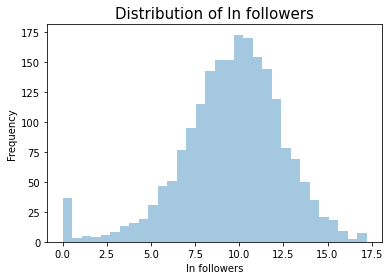

In [442]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=list(map(math.log,int_followers)), hist=True, kde=False, rug=False )
plt.title(str('Distribution of ' + str('ln followers')), size = 15)
plt.xlabel(str('ln followers'))
plt.ylabel('Frequency')

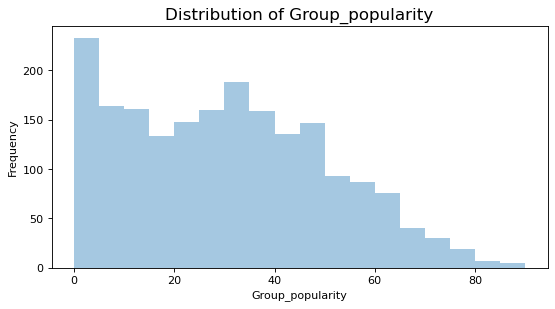

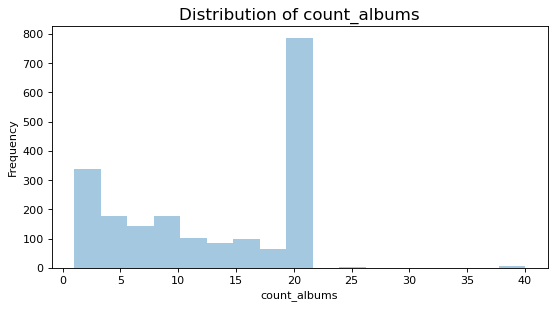

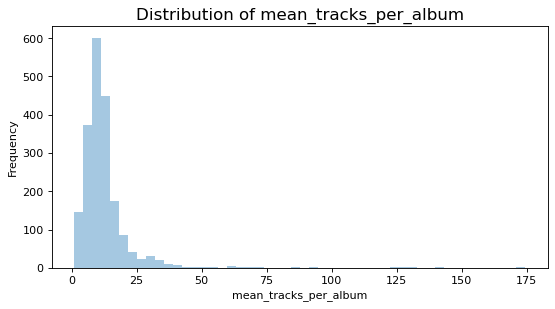

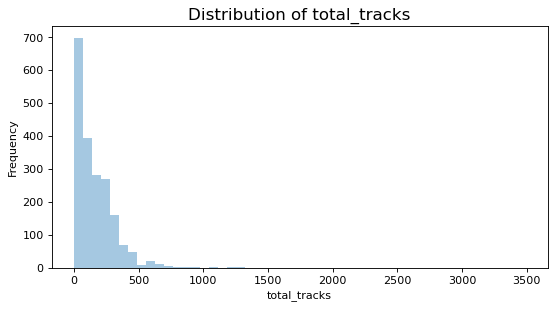

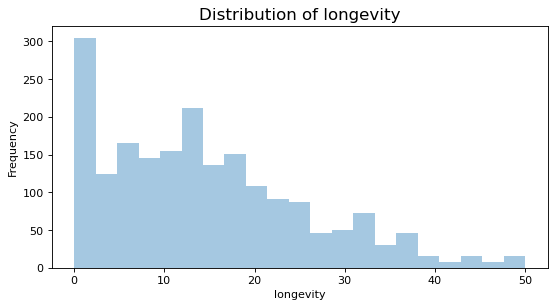

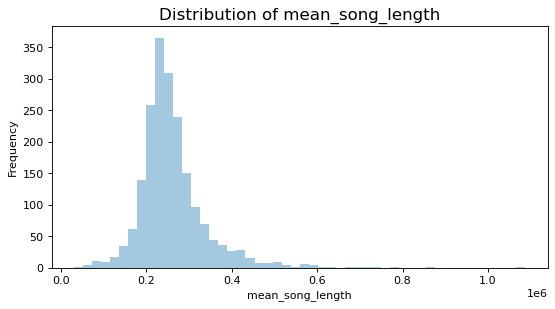

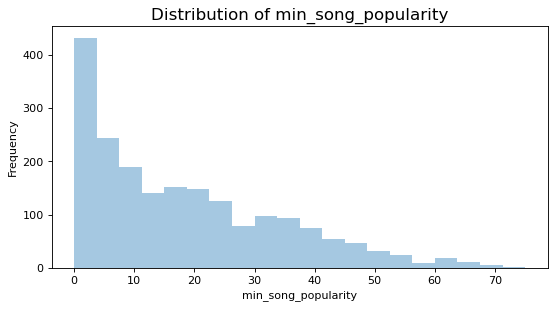

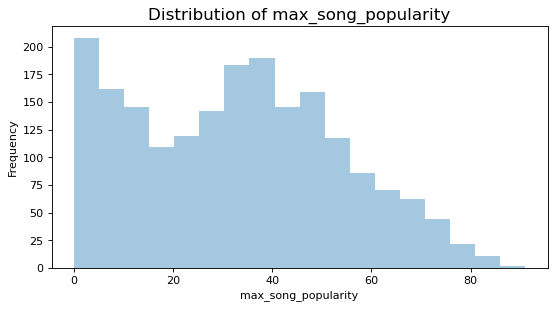

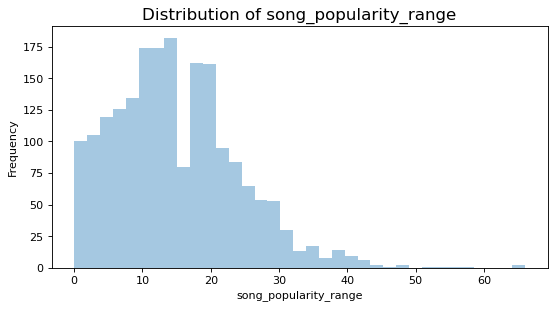

In [444]:
for column in columns:
    figure(figsize=(8, 4), dpi=80)

    # Plot the histogram thanks to the distplot function
    sns.distplot( a=final_df[column], hist=True, kde=False, rug=False )
    plt.title(str('Distribution of ' + str(column)), size = 15)
    plt.xlabel(str(column))
    plt.ylabel('Frequency')

In [439]:
quant_variables = final_df[['Group_popularity', 'Group_followers', 'count_albums', 'mean_tracks_per_album', 'total_tracks', 'longevity',
       'mean_song_length', 'min_song_popularity',
       'max_song_popularity', 'mean_song_danceability',
       'mean_song_acousticness', 'mean_song_energy',
       'mean_song_instrumentalness', 'mean_song_liveness',
       'mean_song_loudness', 'mean_song_speechiness', 'mean_song_tempo',
       'song_popularity_range']]

In [298]:
corr

,Group_popularity,Group_followers,count_albums,mean_tracks_per_album,total_tracks,longevity,mean_song_length,min_song_popularity,max_song_popularity,mean_song_danceability,mean_song_acousticness,mean_song_energy,mean_song_instrumentalness,mean_song_liveness,mean_song_loudness,mean_song_speechiness,mean_song_tempo,song_popularity_range
Group_popularity,1.000000,0.396364,0.720770,0.015290,0.405475,0.260832,-0.073813,0.937452,0.969616,0.274383,0.054058,-0.011936,-0.289243,-0.060048,0.067329,-0.047007,0.054360,0.535830
Group_followers,0.396364,1.000000,0.225945,0.022439,0.147755,0.093247,-0.003172,0.441704,0.364499,0.142191,0.020373,-0.027669,-0.111430,-0.038268,0.038860,-0.048988,-0.017784,0.046279
count_albums,0.720770,0.225945,1.000000,0.062839,0.614410,0.463647,-0.007496,0.618328,0.677956,0.247868,0.009491,-0.011453,-0.224055,-0.067260,0.022285,-0.062013,0.063311,0.439181
mean_tracks_per_album,0.015290,0.022439,0.062839,1.000000,0.639194,0.195512,-0.089109,-0.005161,0.007940,-0.109729,-0.021068,0.055404,0.107344,0.012278,-0.095988,-0.016555,-0.051448,0.026694
total_tracks,0.405475,0.147755,0.614410,0.639194,1.000000,0.400770,-0.062391,0.323873,0.379588,0.072662,0.020874,0.014611,-0.070721,0.004531,-0.122309,-0.078190,0.005857,0.284693
longevity,0.260832,0.093247,0.463647,0.195512,0.400770,1.000000,0.095054,0.180461,0.262176,-0.020266,-0.080732,-0.005296,-0.075308,-0.047479,-0.140000,-0.177404,-0.007482,0.271752
mean_song_length,-0.073813,-0.003172,-0.007496,-0.089109,-0.062391,0.095054,1.000000,-0.083040,-0.091391,-0.210720,-0.018038,-0.227647,0.235378,-0.144279,-0.176843,-0.295027,-0.080287,-0.059745
min_song_popularity,0.937452,0.441704,0.618328,-0.005161,0.323873,0.180461,-0.083040,1.000000,0.902678,0.227592,0.033533,0.019814,-0.254185,-0.039329,0.110810,-0.001066,0.061171,0.277718
max_song_popularity,0.969616,0.364499,0.677956,0.007940,0.379588,0.262176,-0.091391,0.902678,1.000000,0.293698,0.056701,-0.022140,-0.305946,-0.062495,0.061563,-0.049023,0.059958,0.664078
mean_song_danceability,0.274383,0.142191,0.247868,-0.109729,0.072662,-0.020266,-0.210720,0.227592,0.293698,1.000000,0.201136,-0.195547,-0.411938,-0.179977,-0.024732,-0.014170,0.013725,0.260235


<AxesSubplot:>

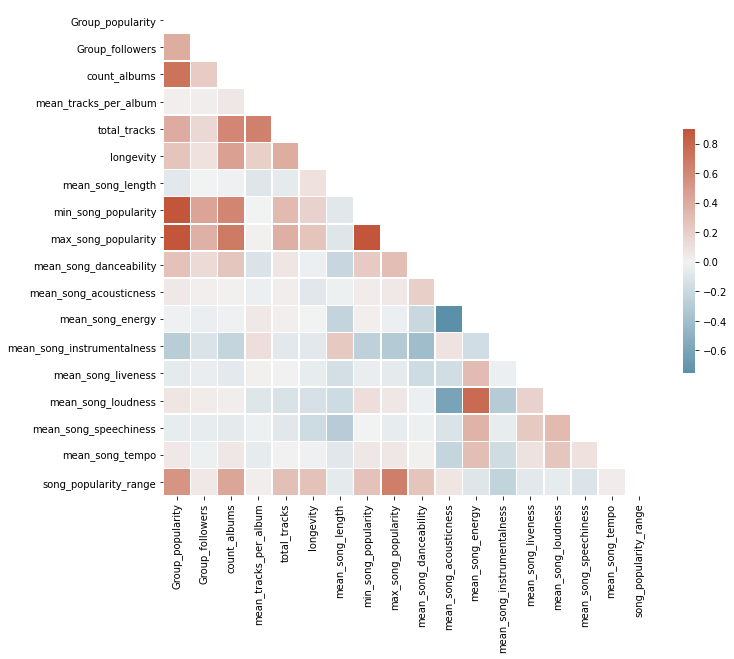

In [304]:
corr = quant_variables.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.xticks(rotation = 45)

### Data dictionary

* Followers: the count of Spotify followers for the group
* Group popularity: a measure from 0 to 100 (high= popular)
* Album count: the count of albums released by the group
* Song count: the number of songs released by the group
* Longevity: number of years between first and last album released by the group
* Top song popularity: popularity from 0 to 100 of the group's top song
* Top 1 to top 10 popularity range: range in popularity (among top 10 songs)... proxy for __one hit wonders__
* Avg popularity top 10 songs: mean popularity across top 10 most popular songs
* Average song length: mean song length (ms)
* Mean song features across top 10:
    * danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	
    * acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic
    * energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
    * instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
    * liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live
    * loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db
    * speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value
    * tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

In [128]:
getTrackFeatures('4GWjjctYOXTUs5lyCZvbNt')

['Not Over Til We Say So',
 'The Devil (Deluxe Edition)',
 'Blue Stahli',
 '2015-10-02',
 221053,
 40,
 0.328,
 2.45e-05,
 0.976,
 0.0736,
 0.373,
 -4.299,
 0.178,
 199.9]

In [106]:
for i in range(0, album_count):
    print(artist_albums['items'][i]['id'])
    print(artist_albums['items'][i]['name'])
    print(artist_albums['items'][i]['total_tracks'])
    print(artist_albums['items'][i]['release_date'])
    print('---------')

6wiuIbDEQliDtYQiWwEfT2
Adios Amigos Live @ Wacken
14
2021-02-19
---------
1IXnfL0ICTJfjPJxUkYML9
BIG ROCKS
13
2017-01-27
---------
5eOR0hnYUgZTIk9rxXJ2U1
Long Stick Goes Boom (Live from the House of Rust)
14
2014-05-23
---------
56H8TLaZ8cXsYEDqBHBCeg
Long Stick Goes Boom: Live From Da House Of Rust
14
2014-04-22
---------
23pKjBxrxsLX4pEw6dAioL
Long Stick Goes Boom (Live from the House of Rust)
14
2014-03-21
---------
1z1clKFuaoNRutPpCBV3c1
Dirty Dynamite
12
2013-03-05
---------
2vuRR4yiav6X70p2wfZ5w7
Dirty Dynamite
12
2013-02-22
---------
56XBq3OEHjGziPzt0RbdG3
Dirty Dynamite
12
2013-01-01
---------
2xIHNHmbm7DQoDKFQqxByO
Hoodoo
11
2010-03-01
---------
0iZQju9t3HwxvEu79xlfJz
Hellraiser
14
2006-09-15
---------
1eTFyWUaGdANtmHPmP3vkU
Hellraiser
14
2006-09-15
---------
0hG4OFT9pGdyCuJG0RQnJn
Fire and Gasoline (Live)
20
2005-01-31
---------
7DJVxbTvIW0b5i0f6A0QHD
Rock the Block
14
2003-02-25
---------
60SUUXo8wX2TlXDNFe5kaG
Stayed Awake All Night
10
1989-10-20
---------
6YpPo3eHUeoNkKoWu

In [28]:
artist_name = unique_artists[0]

In [30]:
wiki_name, spoti_name, spoti_id, popularity, followers = [], [], [], [], []

In [45]:
no_match = sp.search(q='lcg_swag', type="artist" ,limit=1)
no_match

{'artists': {'href': 'https://api.spotify.com/v1/search?query=lcg_swag&type=artist&offset=0&limit=1',
  'items': [],
  'limit': 1,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [52]:
no_match['artists']['total']

0

In [39]:
len(sp.search(q="Acid Bath", type="artist" ,limit=1))

1

In [44]:
id_artist = artist_search['artists']['items'][0]['uri']
id_artist

'spotify:artist:4YveAIZNQZBiWbt7iWsvCa'

In [43]:
name_artist = artist_search['artists']['items'][0]['name']
name_artist

'Krokus'

In [33]:
pop_artist = artist_search['artists']['items'][0]['popularity']
pop_artist

47

In [41]:
followers_artist = artist_search['artists']['items'][0]['followers']['total']
followers_artist

223115

In [ ]:
sp.search(q="Acid Bath", type="artist" ,limit=1)['artists']['items'][0]['popularity']

### Details on SpotiPy

https://spotipy.readthedocs.io/en/2.19.0/

In [3]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

# Knowing 
ids = getTrackIDs('angelicadietzel', '4R0BZVh27NUJhHGLNitU08')

In [8]:
len(ids)

54

In [127]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo]
    return track

In [118]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
#df.to_csv("spotify.csv", sep = ',')


NameError: name 'ids' is not defined

In [117]:
df.columns

NameError: name 'df' is not defined

In [7]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Intro,You Should Be Here,Kehlani,2015-04-28,139261,27,0.683,0.71500,0.683,0.361,0.000000,0.1110,-14.146,0.9540,140.783,5
1,You Should Be Here,You Should Be Here,Kehlani,2015-04-28,157859,52,0.411,0.48800,0.411,0.580,0.000000,0.1190,-5.988,0.0684,140.550,4
2,How That Taste,You Should Be Here,Kehlani,2015-04-28,152595,39,0.437,0.22900,0.437,0.873,0.000000,0.4640,-3.327,0.3770,73.050,4
3,Jealous (feat. Lexii Alijai),You Should Be Here,Kehlani,2015-04-28,218592,47,0.559,0.23000,0.559,0.462,0.000000,0.0997,-8.843,0.2160,115.587,4
4,Niggas,You Should Be Here,Kehlani,2015-04-28,174765,47,0.455,0.04100,0.455,0.688,0.000000,0.3540,-4.747,0.1130,148.038,4
5,Wanted,You Should Be Here,Kehlani,2015-04-28,130588,39,0.511,0.25100,0.511,0.801,0.000000,0.2880,-3.588,0.2670,135.394,4
6,The Way (feat. Chance the Rapper),You Should Be Here,Kehlani,2015-04-28,262520,60,0.746,0.38900,0.746,0.538,0.000000,0.1390,-6.479,0.3200,101.018,4
7,Unconditional,You Should Be Here,Kehlani,2015-04-28,156456,38,0.478,0.20100,0.478,0.640,0.000000,0.0849,-5.417,0.0417,100.099,4
8,The Letter,You Should Be Here,Kehlani,2015-04-28,232169,51,0.448,0.85500,0.448,0.241,0.000000,0.1240,-8.643,0.0328,131.259,4
9,Runnin' - Interlude,You Should Be Here,Kehlani,2015-04-28,137848,42,0.571,0.41400,0.571,0.515,0.000000,0.1210,-8.930,0.4450,133.106,4


# Taking artist string, then 

In [69]:
sp.search(q="Y&T", type="artist" ,limit=1)['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/49Cw140t9jupn4S3udehoP'},
 'followers': {'href': None, 'total': 155045},
 'genres': ['album rock',
  'classic rock',
  'glam metal',
  'hard rock',
  'metal',
  'sleaze rock'],
 'href': 'https://api.spotify.com/v1/artists/49Cw140t9jupn4S3udehoP',
 'id': '49Cw140t9jupn4S3udehoP',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebf62fea7509a1193db7fbc572',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174f62fea7509a1193db7fbc572',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178f62fea7509a1193db7fbc572',
   'width': 160}],
 'name': 'Y&T',
 'popularity': 45,
 'type': 'artist',
 'uri': 'spotify:artist:49Cw140t9jupn4S3udehoP'}

In [28]:
sp.search(q="Acid Bath", type="artist" ,limit=1)['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3n5jeTRWZEbTPJWyHSYUqn'},
 'followers': {'href': None, 'total': 62048},
 'genres': ['alternative metal',
  'doom metal',
  'louisiana metal',
  'sludge metal',
  'stoner metal'],
 'href': 'https://api.spotify.com/v1/artists/3n5jeTRWZEbTPJWyHSYUqn',
 'id': '3n5jeTRWZEbTPJWyHSYUqn',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b273b7e60bf3437eff4ac464195d',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e02b7e60bf3437eff4ac464195d',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d00004851b7e60bf3437eff4ac464195d',
   'width': 64}],
 'name': 'Acid Bath',
 'popularity': 45,
 'type': 'artist',
 'uri': 'spotify:artist:3n5jeTRWZEbTPJWyHSYUqn'}

In [27]:
sp.search(q="Acid Bath", type="artist" ,limit=1)['artists']['items'][0]['popularity']

45

In [14]:
sp.search(q="Pink Floyd", type="artist" ,limit=1)['artists']

{'href': 'https://api.spotify.com/v1/search?query=Pink+Floyd&type=artist&offset=0&limit=1',
 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
   'followers': {'href': None, 'total': 15835391},
   'genres': ['album rock',
    'art rock',
    'classic rock',
    'progressive rock',
    'psychedelic rock',
    'rock',
    'symphonic rock'],
   'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
   'id': '0k17h0D3J5VfsdmQ1iZtE9',
   'images': [{'height': 977,
     'url': 'https://i.scdn.co/image/e69f71e2be4b67b82af90fb8e9d805715e0684fa',
     'width': 1000},
    {'height': 625,
     'url': 'https://i.scdn.co/image/d011c95081cd9a329e506abd7ded47535d524a07',
     'width': 640},
    {'height': 195,
     'url': 'https://i.scdn.co/image/f0a39a8a196a87a7236bdcf8a8708f6d5d3547cc',
     'width': 200},
    {'height': 63,
     'url': 'https://i.scdn.co/image/ec1fb7127168dbaa962404031409c5a293b95ec6',
     'width': 64}],
   'name': 'P

In [32]:
urn = 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'

artist = sp.artist(urn)
print(artist)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'}, 'followers': {'href': None, 'total': 15835391}, 'genres': ['album rock', 'art rock', 'classic rock', 'progressive rock', 'psychedelic rock', 'rock', 'symphonic rock'], 'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9', 'id': '0k17h0D3J5VfsdmQ1iZtE9', 'images': [{'height': 977, 'url': 'https://i.scdn.co/image/e69f71e2be4b67b82af90fb8e9d805715e0684fa', 'width': 1000}, {'height': 625, 'url': 'https://i.scdn.co/image/d011c95081cd9a329e506abd7ded47535d524a07', 'width': 640}, {'height': 195, 'url': 'https://i.scdn.co/image/f0a39a8a196a87a7236bdcf8a8708f6d5d3547cc', 'width': 200}, {'height': 63, 'url': 'https://i.scdn.co/image/ec1fb7127168dbaa962404031409c5a293b95ec6', 'width': 64}], 'name': 'Pink Floyd', 'popularity': 81, 'type': 'artist', 'uri': 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'}


In [38]:
artist_albums = sp.artist_albums('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')
artist_albums['items'][0]['id']

'1NtBP8apWQHu9Sa4WJ7C3l'

In [39]:
album_id = artist_albums['items'][0]['id']
album_id

'1NtBP8apWQHu9Sa4WJ7C3l'

In [46]:
artist_albums['items'][15]['name']

'The Division Bell (2011 Remastered Version)'

In [48]:
artist_albums['items'][15]['total_tracks']

11

In [49]:
artist_albums['items'][15]['release_date']

'1994-03-28'

In [56]:
sp.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')['tracks'][0]['name']

'Wish You Were Here'

In [59]:
sp.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')['tracks'][0]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
    'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
    'id': '0k17h0D3J5VfsdmQ1iZtE9',
    'name': 'Pink Floyd',
    'type': 'artist',
    'uri': 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/0bCAjiUamIFqKJsekOYuRw'},
  'href': 'https://api.spotify.com/v1/albums/0bCAjiUamIFqKJsekOYuRw',
  'id': '0bCAjiUamIFqKJsekOYuRw',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2731a84d71391df7469c5ab8539',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e021a84d71391df7469c5ab8539',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048511a84d71391df7469c5ab8539',
    'width': 64}],
  'name': 'Wish You Were Here',
  'release_date': '1975-09-12',
  'release_date_precision': 'day',


In [63]:
sp.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')['tracks'][0]['album']['release_date']

'1975-09-12'

In [60]:
sp.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')['tracks'][0]['popularity']

76

In [64]:
sp.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')['tracks'][0]['id']

'6mFkJmJqdDVQ1REhVfGgd1'

In [68]:
getTrackFeatures('6mFkJmJqdDVQ1REhVfGgd1')

['Wish You Were Here',
 'Wish You Were Here',
 'Pink Floyd',
 '1975-09-12',
 334743,
 76,
 0.481,
 0.735,
 0.481,
 0.262,
 0.0114,
 0.832,
 -15.73,
 0.0414,
 122.861,
 4]

In [65]:
sp.audio_analysis('6mFkJmJqdDVQ1REhVfGgd1')

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1634615094,
  'analysis_time': 7.73945,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 7381099,
  'duration': 334.7437,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.0,
  'start_of_fade_out': 322.8967,
  'loudness': -15.73,
  'tempo': 122.861,
  'tempo_confidence': 0.273,
  'time_signature': 4,
  'time_signature_confidence': 0.848,
  'key': 7,
  'key_confidence': 0.412,
  'mode': 1,
  'mode_confidence': 0.871,
  'codestring': 'eJxVmgmSBTcKRK9SR9C-3P9i817qt-1xOBwuur4KIUgS0O537D5X_cq32x2njdW-ets3ylnljHG_PpGsfvc6Z3_nLp923_fcr_YxvjHmKWOX8tWx27d2X63Wcb66V_nmqKxQ7tfKKV87pbS25vna4AdztV5LvfNrrP6NNltro9YPXca3Zpm99b2-Xli47XNPQ9c-eHfPXe6tlT_uqoYb1W8_Xz-F_4xZxyzDjfCd3s5ovMwX2uCNy8J73Q-txzdv3Xvty-Nt5zutzDV6v9-sZ6B2LfvySXbiwrPNum9p39yYie_0Nvfk5cv